##Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/text_analytics/Text_Analytics_Project/games_review.csv')
df.head()

,Title,Abstract,Description,Author,Publish Date,URL
0,Batman: Arkham Shadow Review - I Am Batman,Camouflaj is no stranger to superhero VR games...,It's hard to believe it's been nearly a decade...,Mark Delaney,2024-10-28,https://www.gamespot.com/reviews/batman-arkham...
1,Redacted Review - Prison Break,"With a colorful art style and roguelike hooks,...",You wouldn't know just from looking at it--wit...,Richard Wakeling,2024-10-28,https://www.gamespot.com/reviews/redacted-revi...
2,Call Of Duty: Black Ops 6 Campaign Review,Treyarch's latest entry into the Call of Duty ...,Call of Duty: Black Ops 2remains my favorite o...,Phil Hornshaw,2024-10-28,https://www.gamespot.com/reviews/call-of-duty-...
3,Dragon Age: The Veilguard Review In Progress -...,The Veilguard feels like a return to form for ...,Each new entry in the Dragon Age series is alw...,Jordan Ramée,2024-10-28,https://www.gamespot.com/reviews/dragon-age-th...
4,A Quiet Place: The Road Ahead Review - Quite A...,"As noiselessly as a survivor in its world, A Q...",A Quiet Place has quickly grown into one of th...,Mark Delaney,2024-10-21,https://www.gamespot.com/reviews/a-quiet-place...


##Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         419 non-null    object
 1   Abstract      419 non-null    object
 2   Description   419 non-null    object
 3   Author        419 non-null    object
 4   Publish Date  419 non-null    object
 5   URL           419 non-null    object
dtypes: object(6)
memory usage: 19.8+ KB


In [4]:
df.shape

(419, 6)

In [5]:
df.isnull().sum()

,0
Title,0
Abstract,0
Description,0
Author,0
Publish Date,0
URL,0


In [6]:
df.iloc[0]

,0
Title,Batman: Arkham Shadow Review - I Am Batman
Abstract,Camouflaj is no stranger to superhero VR games...
Description,It's hard to believe it's been nearly a decade...
Author,Mark Delaney
Publish Date,2024-10-28
URL,https://www.gamespot.com/reviews/batman-arkham...


In [7]:
df['Description'].iloc[0]

'It\'s hard to believe it\'s been nearly a decade since the last mainline Batman Arkham game. Since then, we\'ve seen several Arkham-adjacent projects come out, only to feel hamstrung or otherwise lacking. 2016\'s Batman Arkham VR was a neat tech demo, but it encompassed only the series\' investigative elements. Both traditional Arkham studios, Rocksteady and WB Montreal, launched Batman-esque co-op games in recent years, but each struggled for several, sometimes similar reasons. Batman: Arkham Shadow stops the tailspin by authentically recapturing the essence of the Arkham series in ways other recent Batmanverse games disappointingly and intentionally avoided, making this the best Batman game since Arkham Knight, even if it doesn\'t soar to the same heights as the series\' finest moments. Batman: Arkham Shadow is a VR-only, direct sequel to Arkham Origins, taking place roughly a year later. That means this version of Batman--once again played by Roger Craig Smith doing a solid Kevin C

##Text Preprocessing

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Step 1: Extract the Title and Description columns
titles = df['Title'].tolist()
descriptions = df['Description'].tolist()

# Step 2: Create documents with titles and descriptions
documents = [f"Game Title: {title}\nDescription: {desc.lower()}" for title, desc in zip(titles, descriptions)]

tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]


print(f"Number of documents: {len(documents)}")

Number of documents: 419


In [10]:
from pprint import pprint
pprint(documents[0])

('Game Title: Batman: Arkham Shadow Review - I Am Batman\n'
 "Description: it's hard to believe it's been nearly a decade since the last "
 "mainline batman arkham game. since then, we've seen several arkham-adjacent "
 "projects come out, only to feel hamstrung or otherwise lacking. 2016's "
 "batman arkham vr was a neat tech demo, but it encompassed only the series' "
 'investigative elements. both traditional arkham studios, rocksteady and wb '
 'montreal, launched batman-esque co-op games in recent years, but each '
 'struggled for several, sometimes similar reasons. batman: arkham shadow '
 'stops the tailspin by authentically recapturing the essence of the arkham '
 'series in ways other recent batmanverse games disappointingly and '
 'intentionally avoided, making this the best batman game since arkham knight, '
 "even if it doesn't soar to the same heights as the series' finest moments. "
 'batman: arkham shadow is a vr-only, direct sequel to arkham origins, taking '
 'place ro

In [31]:
document_0_tokens = documents[0].lower().replace('.', '').split()

print(document_0_tokens)

['game', 'title:', 'batman:', 'arkham', 'shadow', 'review', '-', 'i', 'am', 'batman', 'description:', "it's", 'hard', 'to', 'believe', "it's", 'been', 'nearly', 'a', 'decade', 'since', 'the', 'last', 'mainline', 'batman', 'arkham', 'game', 'since', 'then,', "we've", 'seen', 'several', 'arkham-adjacent', 'projects', 'come', 'out,', 'only', 'to', 'feel', 'hamstrung', 'or', 'otherwise', 'lacking', "2016's", 'batman', 'arkham', 'vr', 'was', 'a', 'neat', 'tech', 'demo,', 'but', 'it', 'encompassed', 'only', 'the', "series'", 'investigative', 'elements', 'both', 'traditional', 'arkham', 'studios,', 'rocksteady', 'and', 'wb', 'montreal,', 'launched', 'batman-esque', 'co-op', 'games', 'in', 'recent', 'years,', 'but', 'each', 'struggled', 'for', 'several,', 'sometimes', 'similar', 'reasons', 'batman:', 'arkham', 'shadow', 'stops', 'the', 'tailspin', 'by', 'authentically', 'recapturing', 'the', 'essence', 'of', 'the', 'arkham', 'series', 'in', 'ways', 'other', 'recent', 'batmanverse', 'games', 'd

##Topic Modeling  
Create a dictionary, using the texts that have already been preprocessed.
The method doc2bow is for converting document (a list of words) into the bag-of-words format.

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

stop_words = set(nltk.corpus.stopwords.words('english'))
tokenized_docs = [[word for word in doc if word.isalpha() and word not in stop_words] for doc in tokenized_docs]

In [14]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [15]:
corpus[0]

[(0, 2),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 2),
 (29, 3),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 2),
 (39, 1),
 (40, 2),
 (41, 2),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 3),
 (52, 4),
 (53, 1),
 (54, 4),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 2),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 2),
 (75, 1),
 (76, 1),
 (77, 2),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 2),
 (84, 1),
 (85, 3),
 (86, 1),
 (87, 4),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [18]:
len(dictionary)

2000

In [20]:
from gensim import corpora, models
from gensim.parsing.preprocessing import preprocess_string
from gensim.utils import simple_preprocess


# List to store individual game topic results
game_topics = []

# Loop through each game's description
for game_description in descriptions:
    # Preprocess the text
    processed_text = preprocess_string(game_description)

    # Create dictionary and corpus for this specific game
    dictionary = corpora.Dictionary([processed_text])
    corpus = [dictionary.doc2bow(processed_text)]

    # Define the LDA model for this game's corpus
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=15, random_state=42)

    # Get topics for this game
    topics = lda_model.print_topics(num_words=5)

    # Store the topics for this game
    game_topics.append(topics)

# `game_topics` now contains topics for each game description individually


In [22]:
game_topics[0]

[(0,
  '0.026*"game" + 0.022*"batman" + 0.018*"arkham" + 0.017*"like" + 0.015*"shadow"'),
 (1,
  '0.017*"arkham" + 0.016*"game" + 0.015*"batman" + 0.013*"like" + 0.010*"seri"'),
 (2,
  '0.022*"game" + 0.014*"batman" + 0.014*"arkham" + 0.013*"like" + 0.009*"seri"'),
 (3,
  '0.010*"batman" + 0.010*"arkham" + 0.008*"like" + 0.007*"game" + 0.005*"shadow"'),
 (4,
  '0.024*"arkham" + 0.020*"game" + 0.016*"like" + 0.015*"batman" + 0.013*"shadow"'),
 (5,
  '0.024*"arkham" + 0.023*"game" + 0.016*"like" + 0.015*"batman" + 0.012*"shadow"'),
 (6,
  '0.021*"game" + 0.018*"batman" + 0.016*"arkham" + 0.014*"like" + 0.009*"shadow"'),
 (7,
  '0.020*"arkham" + 0.020*"game" + 0.013*"like" + 0.013*"batman" + 0.011*"shadow"'),
 (8,
  '0.020*"game" + 0.017*"arkham" + 0.015*"batman" + 0.012*"like" + 0.007*"time"'),
 (9,
  '0.020*"game" + 0.020*"batman" + 0.019*"arkham" + 0.013*"like" + 0.010*"shadow"'),
 (10,
  '0.028*"game" + 0.024*"arkham" + 0.016*"batman" + 0.015*"like" + 0.012*"shadow"'),
 (11,
  '0.032*

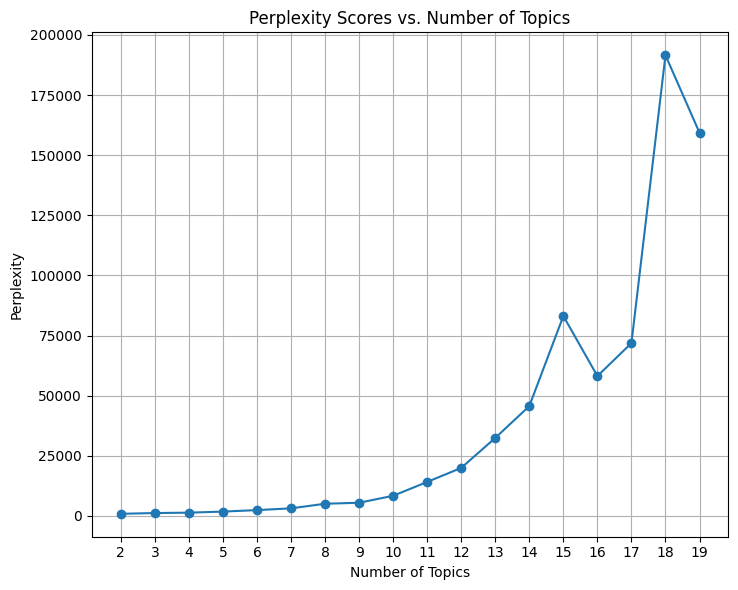

In [41]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim import models
from math import exp

# Define the range of topics
topic_range = range(2, 20)

# Lists to store scores
perplexity_scores = []
coherence_scores = []

# Iterate over the topic range to compute both perplexity and coherence
for n_topics in topic_range:
    # Create the LDA model
    lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics, id2word=dictionary, random_state=42)

    # Compute perplexity
    perplexity_scores.append(exp(-lda_model.log_perplexity(corpus)))  # Convert log perplexity to regular perplexity

    # Compute coherence score
    '''coherence_model = CoherenceModel(model=lda_model, texts=document_0_tokens, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())'''

# Plot the perplexity scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(topic_range, perplexity_scores, marker='o')
plt.title('Perplexity Scores vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.xticks(topic_range)
plt.grid()

# Plot the coherence scores
'''plt.subplot(1, 2, 2)
plt.plot(topic_range, coherence_scores, marker='o', color='orange')
plt.title('Coherence Scores vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.grid()'''

plt.tight_layout()
plt.show()


In [42]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.4 MB/s eta 0:00:00


In [50]:
import pyLDAvis
import pyLDAvis.gensim

n_topics = 2
lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics, id2word=dictionary, random_state=42)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.001337  0.0       1        1  95.365675
0     -0.001337  0.0       2        1   4.634325, topic_info=        Term       Freq      Total Category  logprob  loglift
145   demand  24.000000  24.000000  Default  30.0000  30.0000
347     load  18.000000  18.000000  Default  29.0000  29.0000
470    puzzl  12.000000  12.000000  Default  28.0000  28.0000
155     dial  14.000000  14.000000  Default  27.0000  27.0000
189    entir   7.000000   7.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
234      foe   0.238380   8.121726   Topic2  -5.3725  -0.4568
564     spot   0.181209   4.673959   Topic2  -5.6467  -0.1784
298  instanc   0.160648   3.916971   Topic2  -5.7672  -0.1222
338      leg   0.156758   3.982050   Topic2  -5.7917  -0.1632
43     basic   0.152496   4.053631   Topic2  -5.8193  -0.2086

[149 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.941314     abil
4         1  0.916650      act
22        1  0.734808   arkham
34        1  1.068428  automat
38        1  1.014181    baddi
...     ...       ...      ...
601       1  1.057804     take
603       1  0.667562     tech
607       1  1.057498   temper
609       1  1.085514  tentpol
630       1  0.909772    treat

[101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [52]:
# Assuming lda_model is your trained LDA model
num_words = 15  # Set the number of words to display for each topic

# Get the topics from the LDA model
topics = lda_model.print_topics(num_words=num_words)

# Create a list to store the words for each topic
topic_words_list = []

for topic_id, topic_string in topics:
    # Extract words from the topic string
    words = topic_string.split(' + ')
    # Clean up the words to only keep the actual words, removing weights
    words = [word.split('*')[1].strip('"') for word in words]
    topic_words_list.append(words)

# Print the list of topic words
for i, words in enumerate(topic_words_list):
    print(f"Topic {i}: {words}")


Topic 0: ['demand', 'load', 'puzzl', 'dial', 'entir', 'belt', 'regardless', 'treat', 'merit', 'joker', 'experienc', 'surviv', 'foe', 'look', 'problem']
Topic 1: ['demand', 'load', 'dial', 'puzzl', 'foe', 'entir', 'surviv', 'joker', 'treat', 'regardless', 'belt', 'experienc', 'merit', 'problem', 'look']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
